Dataset Shape: (40791, 11)

First few rows:
DATA QUALITY ASSESSMENT

Dataset Info:
Total Records: 40,791
Total Features: 11

Data Types:
Is_top_5_League         int64
Based_rich_nation       int64
Is_top_ranked_nation    int64
EU_National             int64
Caps                    int64
Apps                    int64
Age                     int64
Reputation              int64
Is_top_prev_club        int64
Last_Transfer_Fee       int64
Salary                  int64
dtype: object

Missing Values:
Is_top_5_League         0
Based_rich_nation       0
Is_top_ranked_nation    0
EU_National             0
Caps                    0
Apps                    0
Age                     0
Reputation              0
Is_top_prev_club        0
Last_Transfer_Fee       0
Salary                  0
dtype: int64

Duplicate Rows: 482

Unique Values per Feature:
Is_top_5_League          :      2 unique values
Based_rich_nation        :      2 unique values
Is_top_ranked_nation     :      3 unique values
EU_Nationa

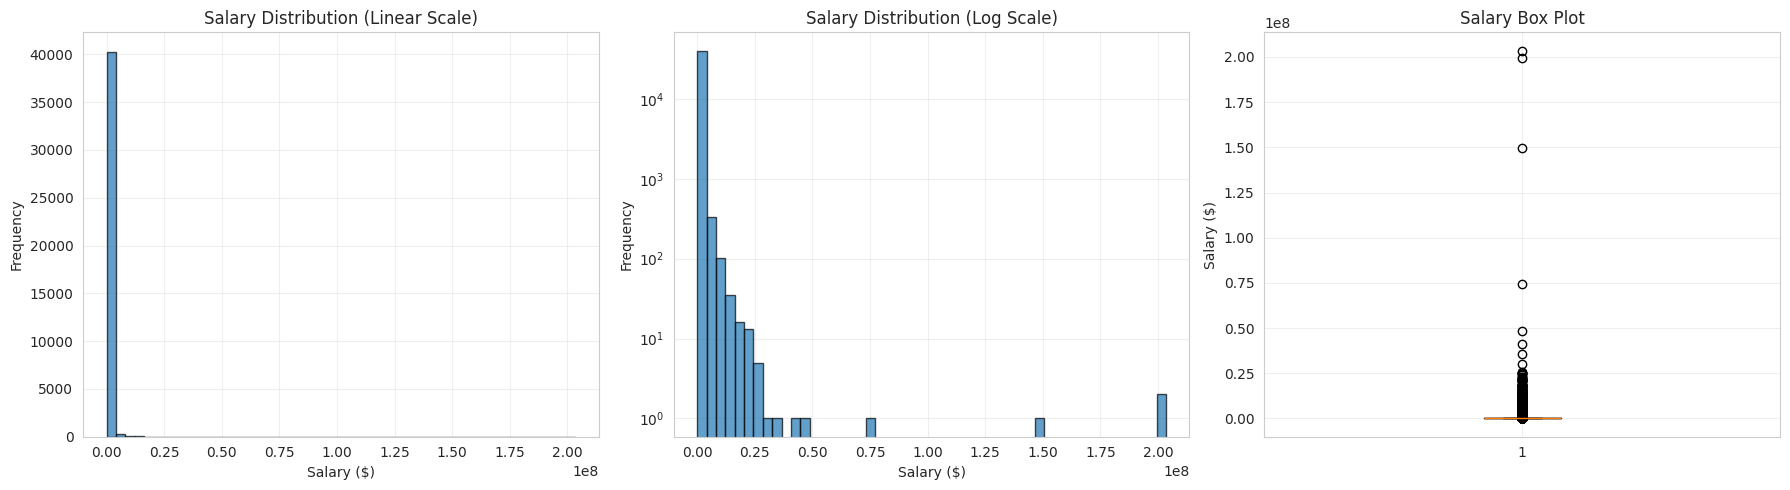


Salary Percentiles:
10th percentile: $6,750
25th percentile: $16,500
50th percentile: $44,500
75th percentile: $156,000
90th percentile: $606,000
95th percentile: $1,223,000
99th percentile: $4,852,000
FEATURE DISTRIBUTION ANALYSIS


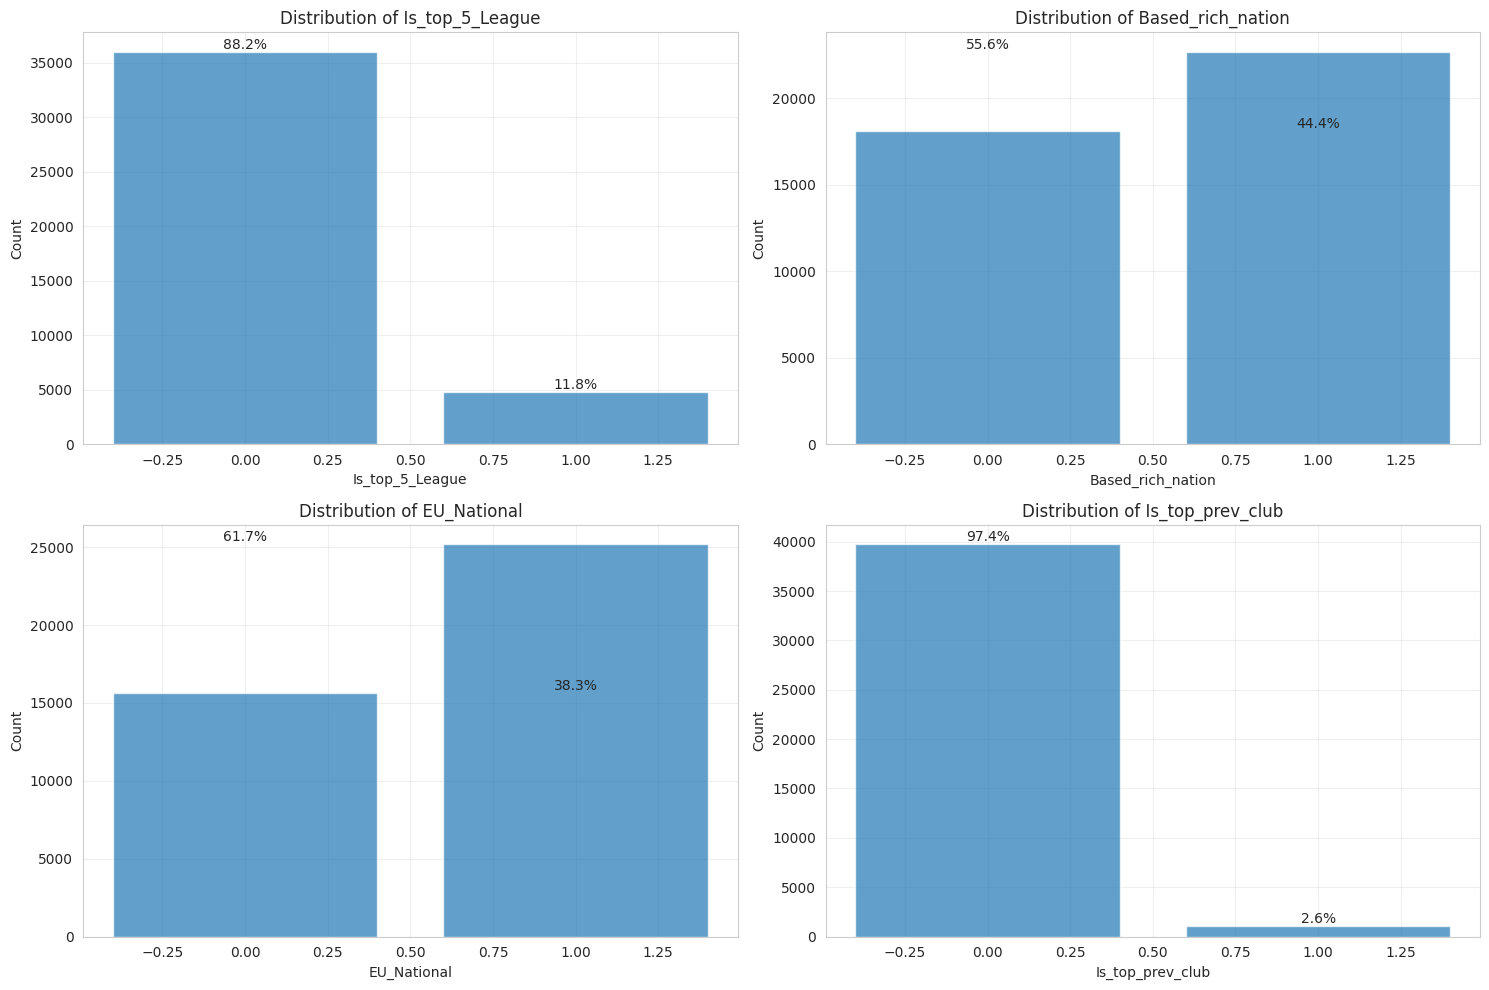

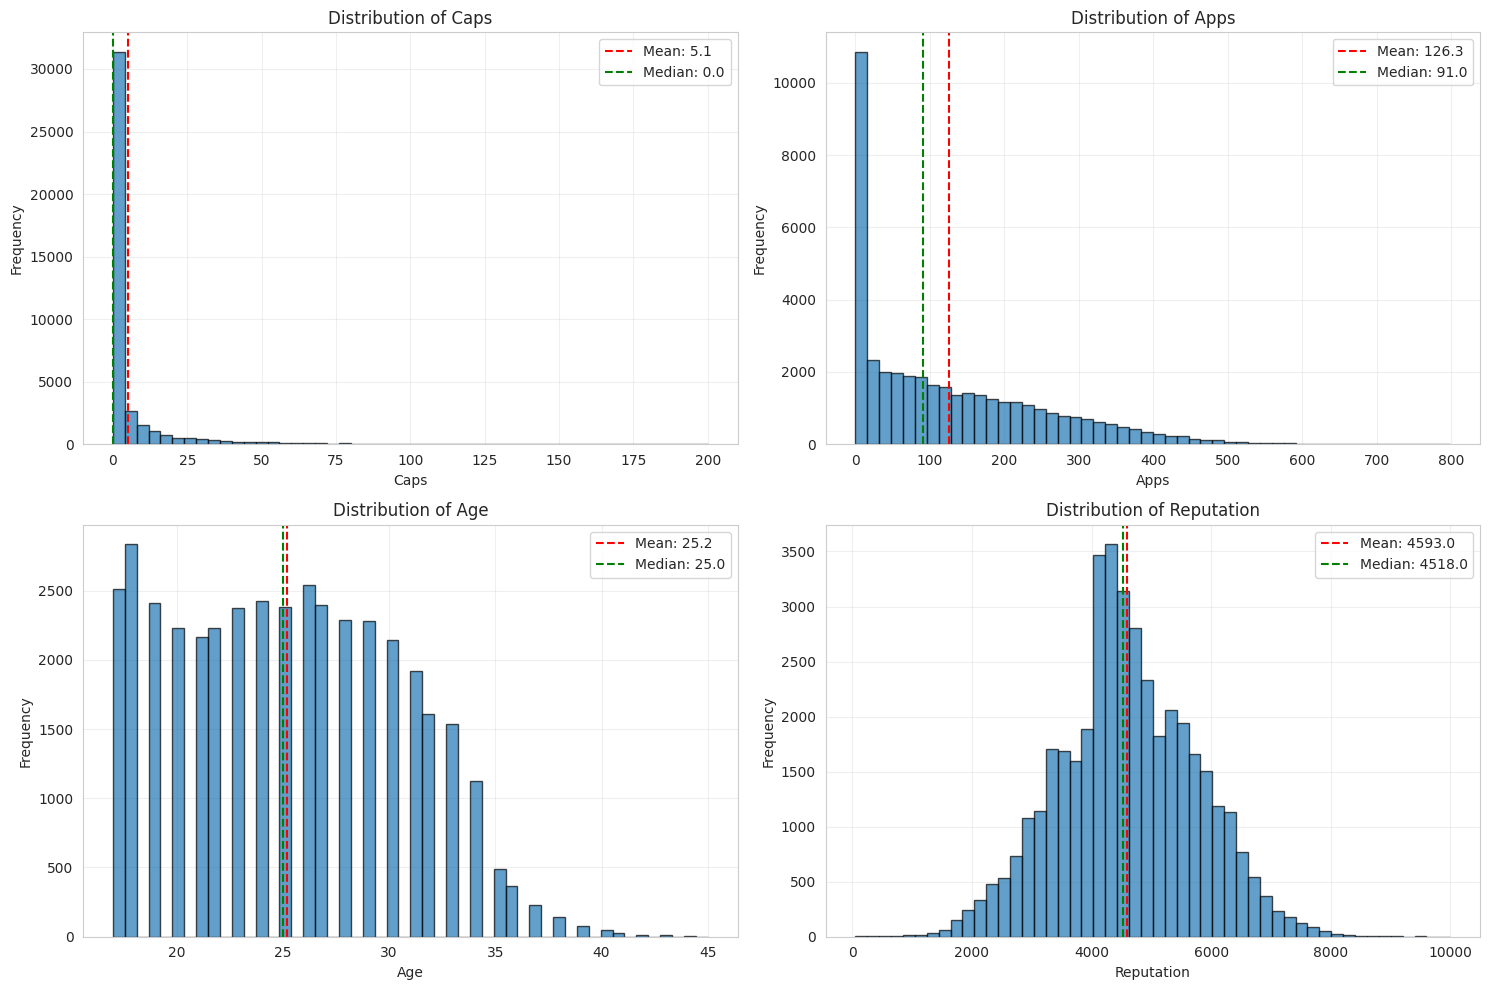

CORRELATION ANALYSIS


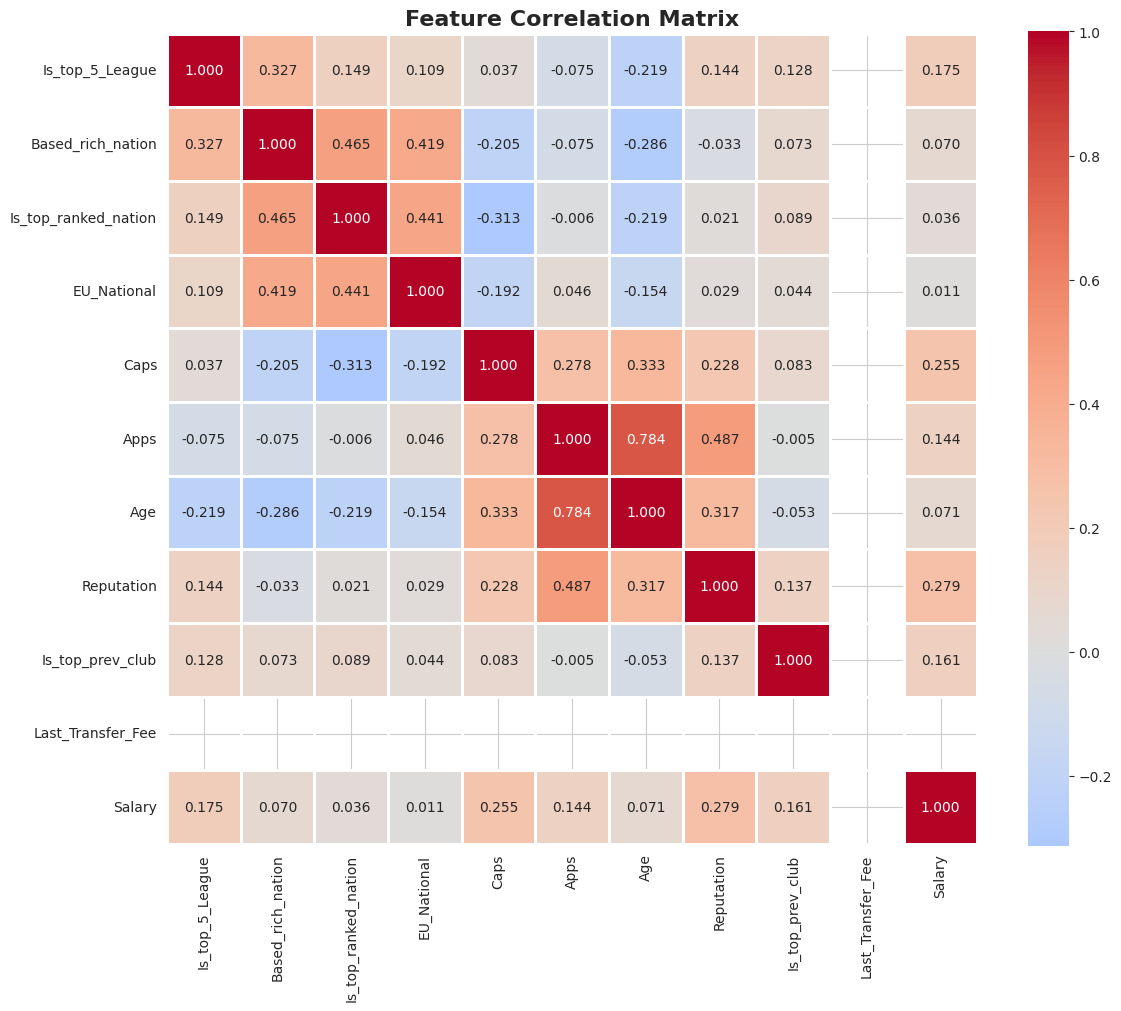


Correlation with Salary:
Reputation               :  0.2789
Caps                     :  0.2553
Is_top_5_League          :  0.1747
Is_top_prev_club         :  0.1613
Apps                     :  0.1441
Age                      :  0.0709
Based_rich_nation        :  0.0700
Is_top_ranked_nation     :  0.0364
EU_National              :  0.0105
Last_Transfer_Fee        :     nan
FEATURE vs SALARY ANALYSIS


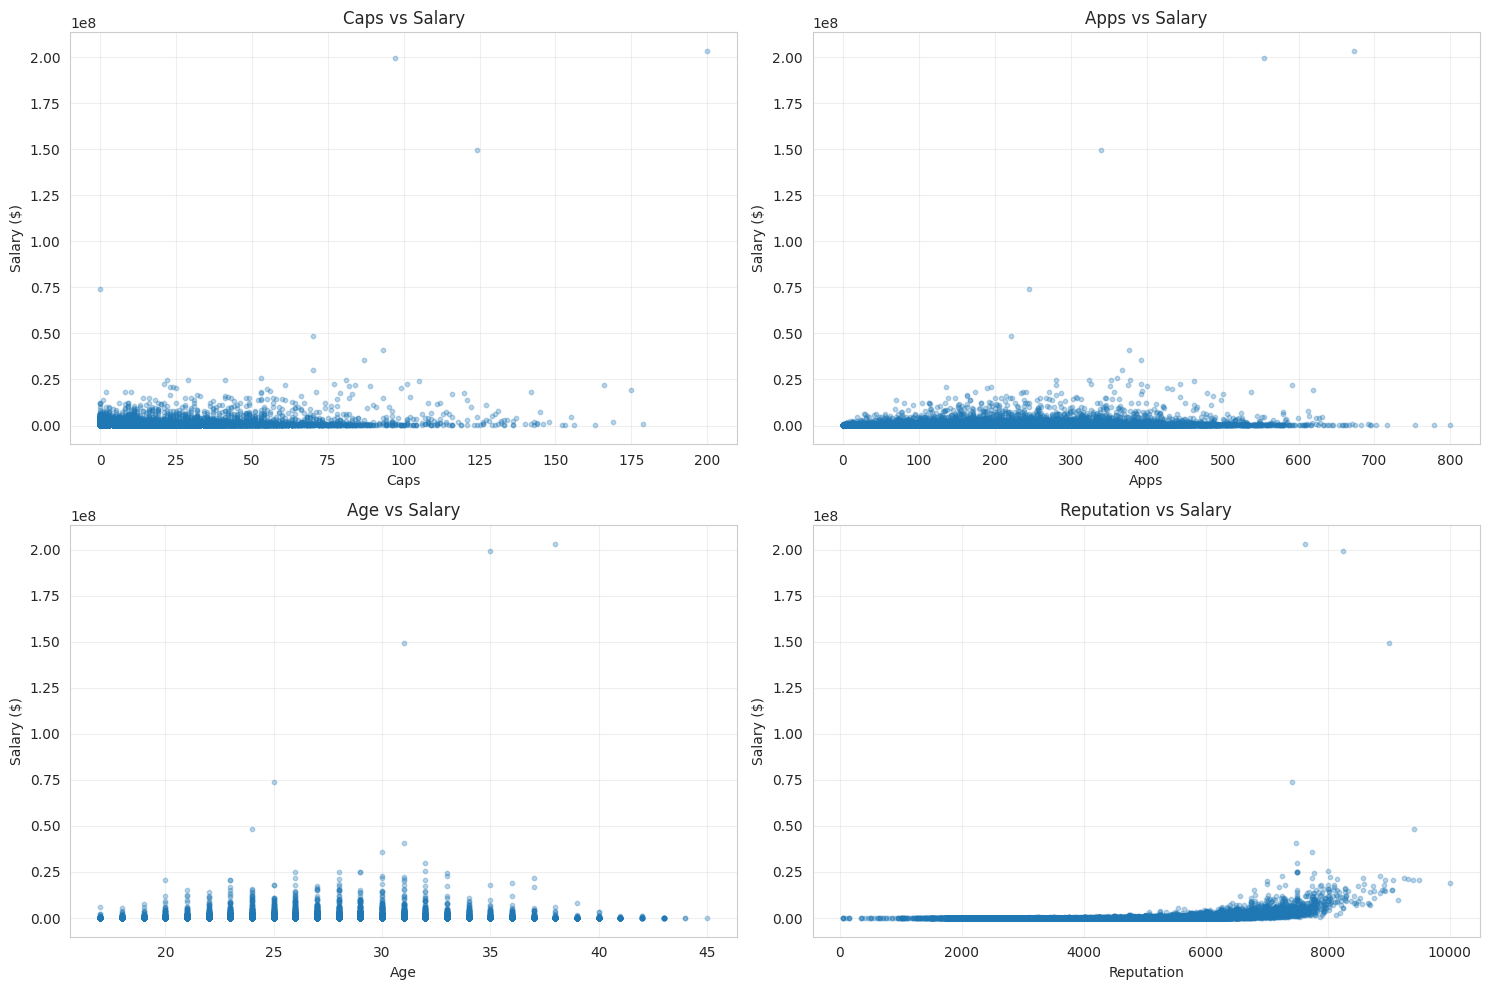

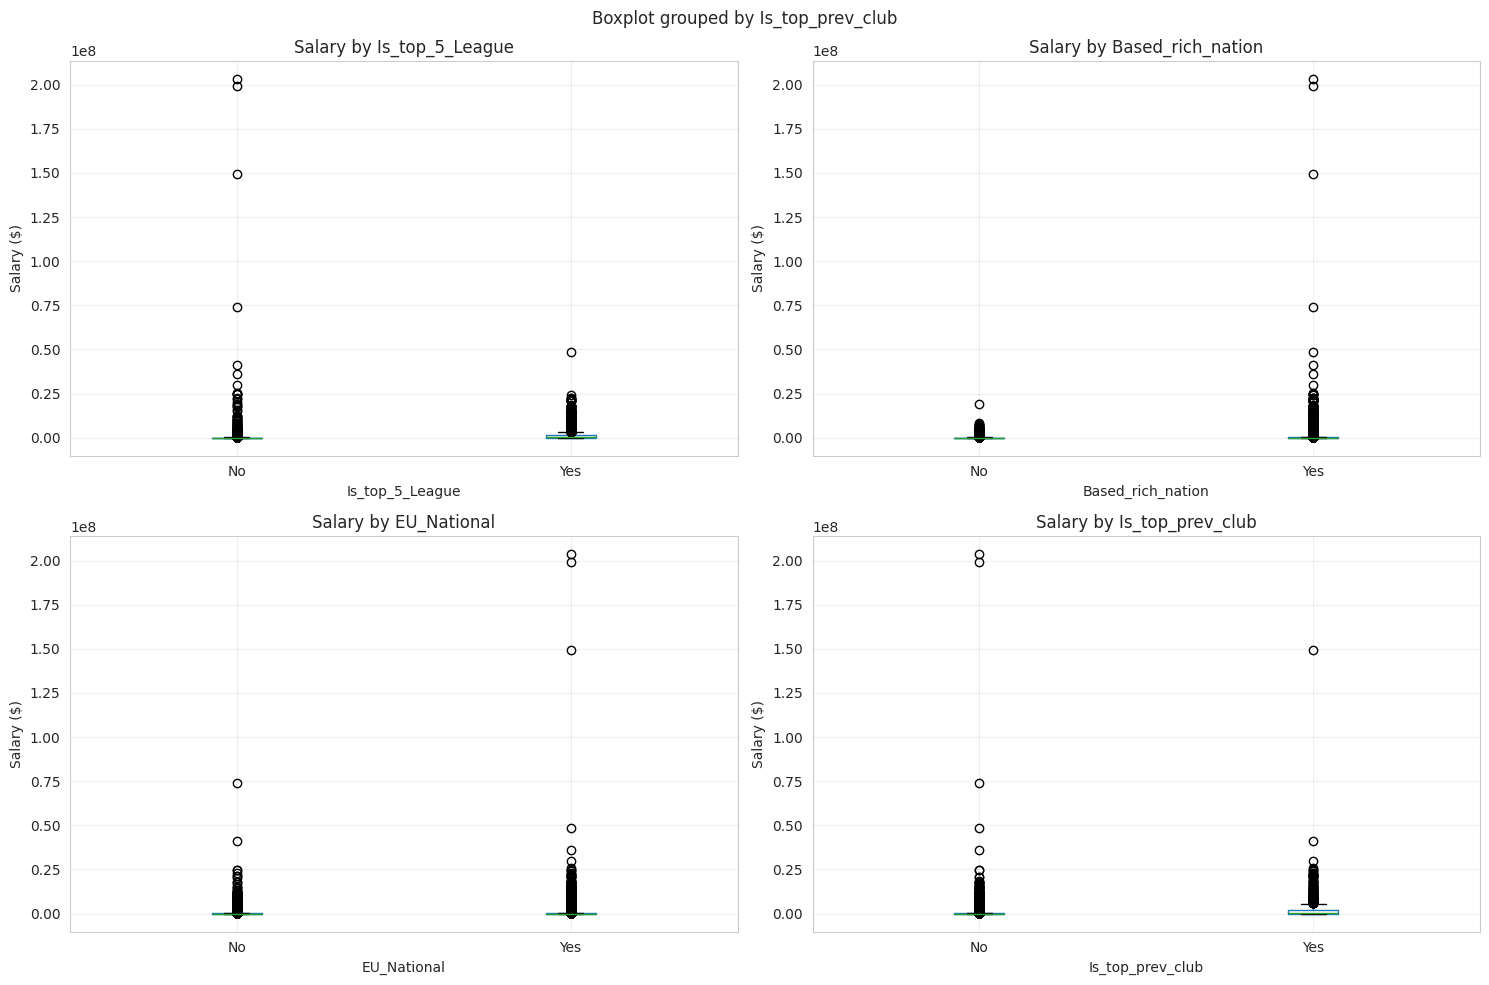


Mean Salary by Binary Features:

Is_top_5_League:
  Is_top_5_League=0: $190,786
  Is_top_5_League=1: $1,277,738
  Difference: $1,086,952 (+569.7%)

Based_rich_nation:
  Based_rich_nation=0: $161,826
  Based_rich_nation=1: $444,351
  Difference: $282,526 (+174.6%)

EU_National:
  EU_National=0: $292,056
  EU_National=1: $335,550
  Difference: $43,494 (+14.9%)

Is_top_prev_club:
  Is_top_prev_club=0: $265,739
  Is_top_prev_club=1: $2,288,762
  Difference: $2,023,024 (+761.3%)
KEY INSIGHTS

1. DATA QUALITY:
   - No missing values
   - All features are numeric
   - 40,791 records available for modeling

2. TARGET VARIABLE (SALARY):
   - Highly skewed (skewness: 63.22)
   - Range: $180 to $203,478,000
   - Median: $44,500
   - Log transformation recommended for modeling

3. FEATURE CORRELATIONS:
   Top 3 correlated features:
   - Reputation: 0.2789
   - Caps: 0.2553
   - Is_top_5_League: 0.1747

4. RECOMMENDATIONS:
   - Use log transformation for salary
   - Focus on Reputation and Caps as

In [2]:
# This is a Python representation of the Jupyter notebook
# Convert to actual .ipynb format using: jupytext --to notebook eda.py


# # Football Player Salary Prediction - Exploratory Data Analysis
#
# ## Objective
# Analyze the football player wages dataset to understand:
# - Data quality and completeness
# - Distribution of features and target variable
# - Relationships between features and salary
# - Feature importance for prediction
#
# ## Dataset Overview
# The dataset contains information about football players including:
# - League and club characteristics
# - Player nationality and international caps
# - Career statistics (appearances)
# - Player reputation
# - Annual salary (target variable)

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# %%
# Load data
df = pd.read_csv('wages_cleaned.csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()


# ## 1. Data Quality Assessment

# %%
print("="*70)
print("DATA QUALITY ASSESSMENT")
print("="*70)

print("\nDataset Info:")
print(f"Total Records: {len(df):,}")
print(f"Total Features: {len(df.columns)}")

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDuplicate Rows:", df.duplicated().sum())

# %%
# Check unique values for categorical features
print("\nUnique Values per Feature:")
for col in df.columns:
    n_unique = df[col].nunique()
    print(f"{col:25s}: {n_unique:6d} unique values")


# ## 2. Target Variable Analysis


print("="*70)
print("SALARY DISTRIBUTION ANALYSIS")
print("="*70)

print("\nSalary Statistics:")
print(df['Salary'].describe())

print(f"\nSkewness: {df['Salary'].skew():.2f}")
print(f"Kurtosis: {df['Salary'].kurtosis():.2f}")

# Outlier detection
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Salary'] < Q1 - 1.5*IQR) | (df['Salary'] > Q3 + 1.5*IQR)]
print(f"\nOutliers: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)")


# Visualize salary distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
axes[0].hist(df['Salary'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Salary ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Salary Distribution (Linear Scale)')
axes[0].grid(True, alpha=0.3)

# Log scale histogram
axes[1].hist(df['Salary'], bins=50, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Salary ($)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Salary Distribution (Log Scale)')
axes[1].set_yscale('log')
axes[1].grid(True, alpha=0.3)

# Box plot
axes[2].boxplot(df['Salary'])
axes[2].set_ylabel('Salary ($)')
axes[2].set_title('Salary Box Plot')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Salary percentiles
percentiles = [10, 25, 50, 75, 90, 95, 99]
print("\nSalary Percentiles:")
for p in percentiles:
    value = df['Salary'].quantile(p/100)
    print(f"{p}th percentile: ${value:,.0f}")


# ## 3. Feature Distribution Analysis

# %%
print("="*70)
print("FEATURE DISTRIBUTION ANALYSIS")
print("="*70)

# Binary features
binary_features = ['Is_top_5_League', 'Based_rich_nation', 'EU_National', 'Is_top_prev_club']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(binary_features):
    counts = df[feature].value_counts()
    axes[idx].bar(counts.index, counts.values, alpha=0.7)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Count')
    axes[idx].set_title(f'Distribution of {feature}')
    axes[idx].grid(True, alpha=0.3)

    # Add percentage labels
    total = len(df)
    for i, v in enumerate(counts.values):
        axes[idx].text(i, v, f'{v/total*100:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# %%
# Continuous features
continuous_features = ['Caps', 'Apps', 'Age', 'Reputation']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(continuous_features):
    axes[idx].hist(df[feature], bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Distribution of {feature}')
    axes[idx].grid(True, alpha=0.3)

    # Add statistics
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.1f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.1f}')
    axes[idx].legend()

plt.tight_layout()
plt.show()


# ## 4. Correlation Analysis

# %%
print("="*70)
print("CORRELATION ANALYSIS")
print("="*70)

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# %%
# Correlation with target variable
print("\nCorrelation with Salary:")
salary_corr = correlation_matrix['Salary'].sort_values(ascending=False)
for feature, corr in salary_corr.items():
    if feature != 'Salary':
        print(f"{feature:25s}: {corr:7.4f}")


# ## 5. Relationship Analysis

# %%
print("="*70)
print("FEATURE vs SALARY ANALYSIS")
print("="*70)

# Scatter plots for continuous features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(continuous_features):
    axes[idx].scatter(df[feature], df['Salary'], alpha=0.3, s=10)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Salary ($)')
    axes[idx].set_title(f'{feature} vs Salary')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# %%
# Box plots for categorical features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(binary_features):
    df.boxplot(column='Salary', by=feature, ax=axes[idx])
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Salary ($)')
    axes[idx].set_title(f'Salary by {feature}')
    axes[idx].grid(True, alpha=0.3)
    plt.sca(axes[idx])
    plt.xticks([1, 2], ['No', 'Yes'])

plt.tight_layout()
plt.show()

# %%
# Statistical comparison
print("\nMean Salary by Binary Features:")
for feature in binary_features:
    mean_0 = df[df[feature] == 0]['Salary'].mean()
    mean_1 = df[df[feature] == 1]['Salary'].mean()
    diff = mean_1 - mean_0
    print(f"\n{feature}:")
    print(f"  {feature}=0: ${mean_0:,.0f}")
    print(f"  {feature}=1: ${mean_1:,.0f}")
    print(f"  Difference: ${diff:,.0f} ({diff/mean_0*100:+.1f}%)")

# ## 6. Insights and Conclusions

# %%
print("="*70)
print("KEY INSIGHTS")
print("="*70)

print("\n1. DATA QUALITY:")
print("   - No missing values")
print("   - All features are numeric")
print(f"   - {len(df):,} records available for modeling")

print("\n2. TARGET VARIABLE (SALARY):")
print(f"   - Highly skewed (skewness: {df['Salary'].skew():.2f})")
print(f"   - Range: ${df['Salary'].min():,.0f} to ${df['Salary'].max():,.0f}")
print(f"   - Median: ${df['Salary'].median():,.0f}")
print("   - Log transformation recommended for modeling")

print("\n3. FEATURE CORRELATIONS:")
top_3_features = salary_corr.drop('Salary').head(3)
print("   Top 3 correlated features:")
for feature, corr in top_3_features.items():
    print(f"   - {feature}: {corr:.4f}")

print("\n4. RECOMMENDATIONS:")
print("   - Use log transformation for salary")
print("   - Focus on Reputation and Caps as key predictors")
print("   - Consider tree-based models (Random Forest, XGBoost)")
print("   - Use cross-validation to prevent overfitting")

# %%